### Changement de répertoire de travail

In [1]:
# L'utilisateur devra adapter ce chemin d'accès en fonction du sien
%cd C:\Users\admin\Desktop\ENSAE\Pyhton for DS\DM Module Python version finale

C:\Users\admin\Desktop\ENSAE\Pyhton for DS\DM Module Python version finale


## Importation des modules

In [2]:
from ensae2019.fonction_plot import plot_geo_time_value 
from ensae2019.fonction_plot_gif import plot_geo_time_value_gif
from ensae2019.fonction_plot_mp4 import plot_geo_time_value_mp4
from pyproj import Proj, transform
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

## Chargement des données

Dans cet exemple, nous utilisons le module que nous avons créé, afin de représenter les émissions polluantes 
des entreprises collectées par le Bureau de recherches géologiques et minières (BRGM) sur plusieurs années. 

Nous allons nous intéresser aux données de 2003 à 2017. Les données sont disponibles sur leur site internet.Elles ont été téléchargées et enregistrées dans un fichier csv nommé 'dataset' 

In [3]:

df_metro = pd.read_csv("example/dataset.csv") # rassurez vous que le fichier est bien stcoké dans le répertoire courant 
x, y = df_metro['LLX'], df_metro['LLY'] #  y=latitude, x=Longitude

## Représentation des emissions polluantes en France de 2004 à 2007 en mosaïque
Pour cette application, on se limite aux emissions polluantes de 2004 à 2007 

In [4]:
years = range(2004, 2008)
years_str = [str(year) for year in years] # transformer chaine de caractère 
values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] in years_str]].astype('float') 

On voudrait représenter ces données dans une grille contenant deux colonnes et deux lignes. Le système de projection utilisé est le Mercator qui améliore l'affichage.

Après exécution, le graphique est sauvegardé dans le fichier "graphe.pdf" au niveau du répertoire courant

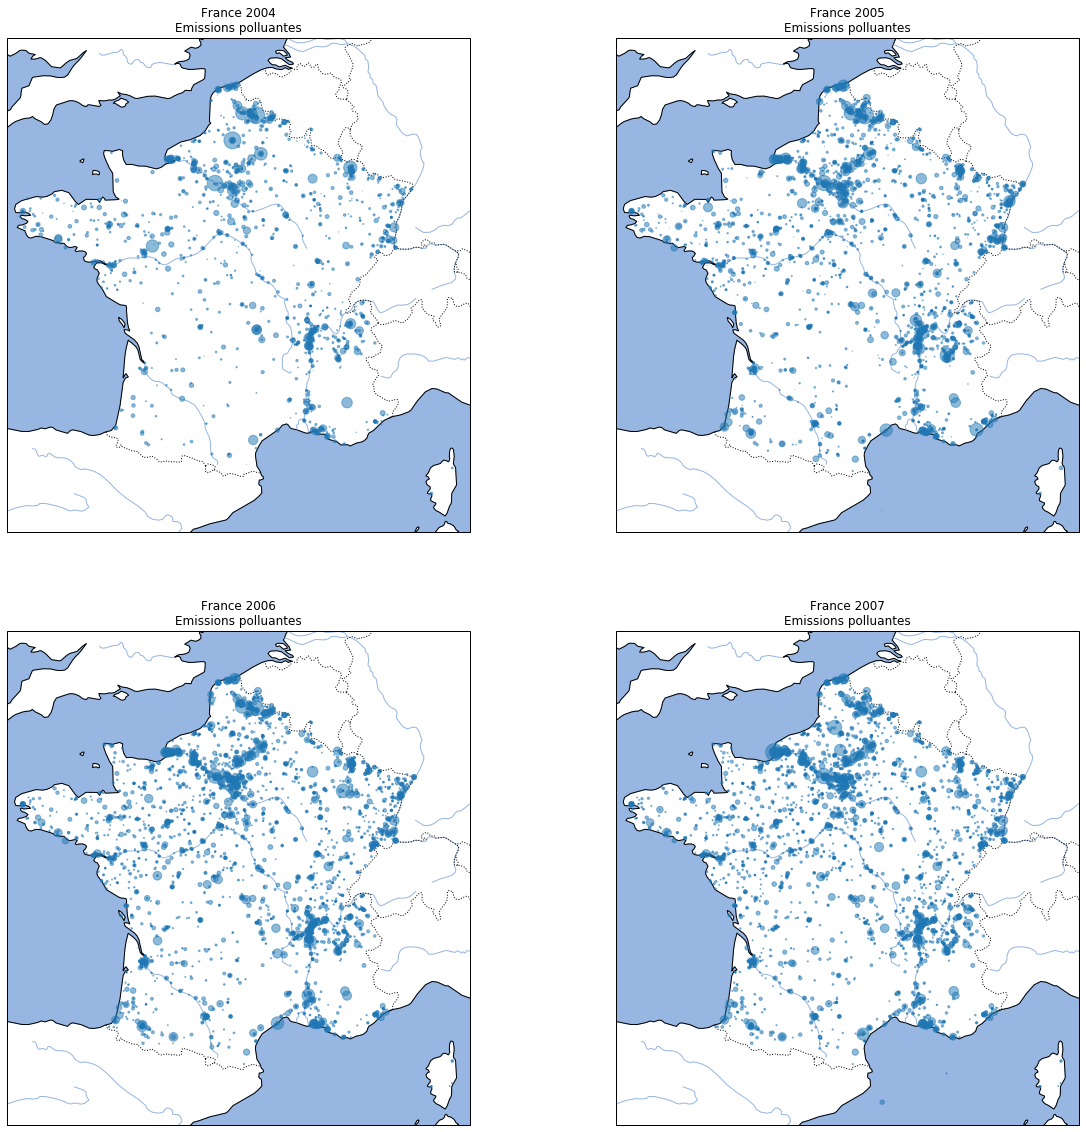

In [60]:
#♠ Le Subplot permet d’organiser les différents tracés à l’intérieur d’une grille d’affichage.
fig, axs = plt.subplots(2,2,figsize=(20,20), subplot_kw={'projection': ccrs.Mercator()}) 
#le figsize renseigne la taille de la grille
years = list(np.arange(2004,2008))
plot_geo_time_value(x=x,y=y,year=years,value=values,axs=axs,hue='Emissions polluantes') 
# x: vecteur de longitudes, 
# y: vecteur de latitudes, 
# year: les années à représenter, 
# value: valeurs numériques à représenter, 
# axs: axes matplotlib sur lesquels tracer, 
# hue: sens de la valeur numérique ici il s'agit des emissions polluantes 

On peut apercevoir à l'écran quatre cartes représentant chacune les émissions polluantes d'une année donnée. 
La taille des points est une fonction croissante de la quantité d'émissions polluantes.

Globalement de 2004 à 2007, il y a croissance des quantités d'émissions polluantes. On peut aussi ajouter qu'il y a plus d'émissions dans le Nord de la France

## Représentation des émissions de 2003 à 2017 sous format gif
Le gif crée est sauvegardé dans le répertoire sous l'appelation 'graphe.gif'

In [5]:
years = range(2003, 2018)
years_str = [str(year) for year in years] # transformer chaine de caractère 
values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] in years_str]].astype('float')

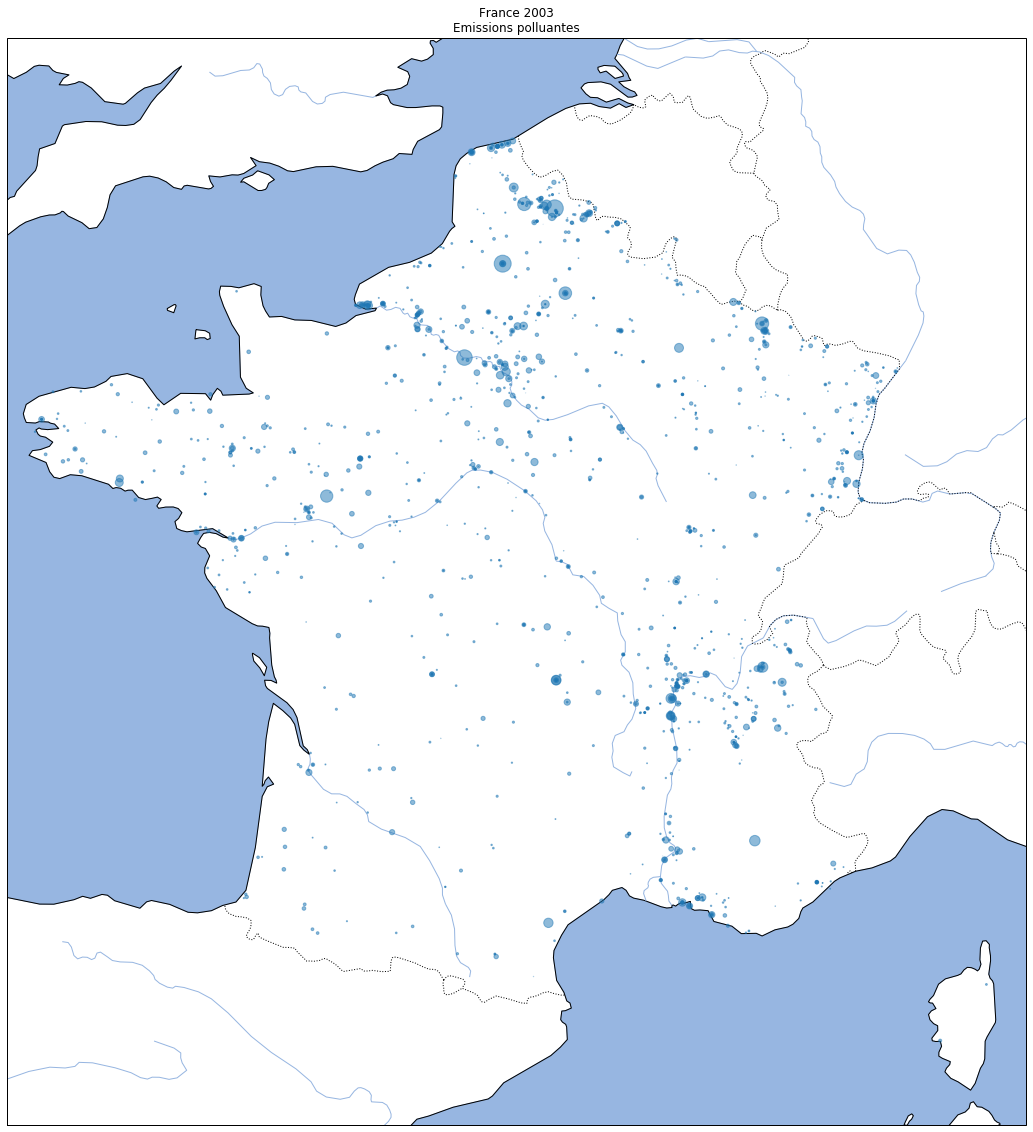

In [20]:
fig, axs = plt.subplots(figsize=(20,20), subplot_kw={'projection': ccrs.Mercator()}) 
# pour cette représentation, on a pas besoin de partitionner la grille d'affichage comme dans le cas précédent
years = list(np.arange(2003,2018))
plot_geo_time_value_gif(x=x,y=y,year=years,value=values,axs=axs, fig=fig, hue='Emissions polluantes')  
# x: vecteur de longitudes, 
# y: vecteur de latitudes, 
# year: les années à représenter, 
# value: valeurs numériques à représenter, 
# axs: axes matplotlib sur lesquels tracer, 
# hue: sens de la valeur numérique ici il s'agit des emissions polluantes 

Le constat fait précédemment sur l'évolution des émissions polluantes reste le même jusqu'en 2017. 

## Représentation des émissions de 2003 à 2017 sous format mp4
Avant d'executer le code ci-dessuous, il faut d'abord installer la librairie de ffmepg

La vidéo mp4 créea après exécution sera stockée dans le repertoire sous le nom 'graphe.mp4'

In [5]:
years = range(2003, 2018)
years_str = [str(year) for year in years] # transformer chaine de caractère 
values = df_metro[[colname for colname in df_metro.columns.values if colname[-4:] in years_str]].astype('float')

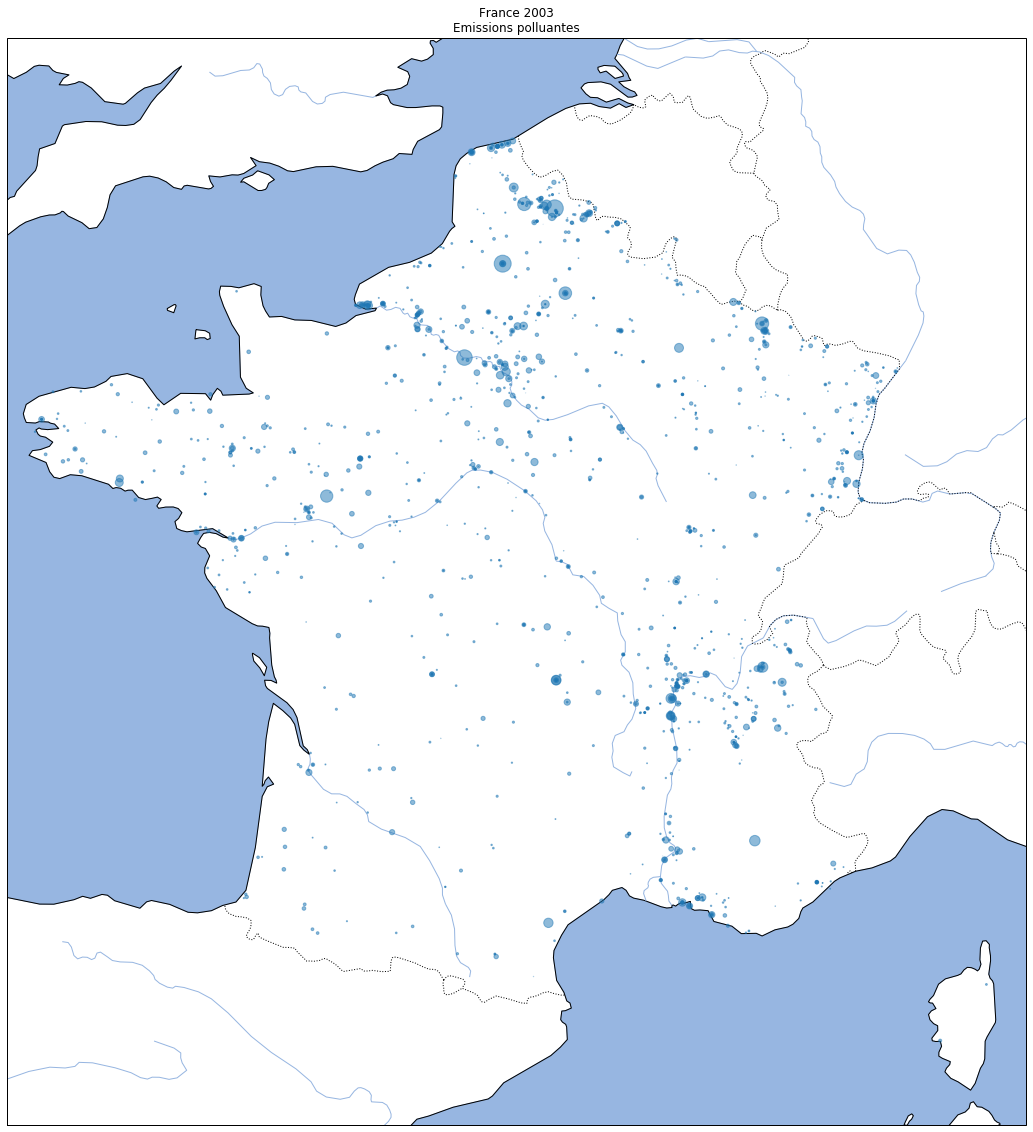

In [6]:
# De même que pour le gif, on a pas besoin de partitionner la grille
fig, axs = plt.subplots(figsize=(20,20), subplot_kw={'projection': ccrs.Mercator()}) 
years = list(np.arange(2003,2018))
# les années et valeurs sont identiques à celles du Gif donc on ne refait plus les même étapes

plot_geo_time_value_mp4(x=x,y=y,year=years,value=values,axs=axs,fig=fig, hue='Emissions polluantes')
# paramètres identiques à ceux du Gif